In [1]:
import numpy as np
import pandas as pd
import random
import sklearn
from statistics import mean, stdev
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from pyscm import SetCoveringMachineClassifier
from randomscm.randomscm import RandomScmClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [2]:
np.random.seed(13)


# Récupération du fichier et mise en forme de la matrice de données

In [3]:
metadata = pd.read_excel('metadata.xlsx')
df = pd.read_csv('C18_metabolomics.csv', index_col =0)

In [4]:
# on extrait la liste de labels/targets
y = df["targets"]
# on prend la matrice de données sans le target
X = df.iloc[:, :-1]
# on extrait la liste du nom des features
features_names = X.columns

y.value_counts()

CD        50
UC        30
nonIBD    25
Name: targets, dtype: int64

In [5]:
# # on consolide les cas 'CD' (Crohn's disease) et "UC" (ulcerative colitis) sous la même étiquette 'IBD' (inflamatory bowel disease)

# y = y.str.replace('UC', 'IBD')
# y = y.str.replace('CD', 'IBD')

# y.value_counts()

In [6]:
# On sépare les données dans le groupe d'entrainement le le groupe test
PERCENT_TEST = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PERCENT_TEST, random_state=42)

# Aprentissage automatique multiclasse

La plupart des modèles de classification sont en mesure de séparer les données en plus que 2 classes à la fois. 
Dans le cas présent, nous avons 3 classes possibles pour nos échantillons de selles : 
* 'nonIBD' (aucune maladie inflamatoire intestinales )
* 'UC' (colites ulcéreuse)
* 'CD' (maladie de Chron)

## Arbres de décision

## Exercise : écrivez le code nécessaire pour entrainer un arbre de décision sur les données X_train, y_train et produisez les prédiction pour le jeux de données X_test

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X= X_train, y= y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) 
FirstDT_acc = accuracy
print("Accuracy = {}".format(accuracy))

Accuracy = 0.42857142857142855


In [8]:
# Parametres qu'il est possible de donner au modèle
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


### Exercice : veuillez afficher la profondeur de l'arbre de décision qui a été appris

In [9]:
# réponse
print(clf.get_depth())

5


Vous pouvez aller consulter les méthodes qui s'appliquent aux arbres de décision ici: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Métriques

Les métriques servent deux buts principaux en apprentissage automatique: </br>
* Elles servent à évaluer la qualité de notre modèle suite à son entraînement. 
* Mais elles servent aussi à informer l'algorithme sur quelle métrique optimiser durant l'entraînement. 
Par exemple, un arbre de décision entrainé pour optimiser l'exactitude (accuracy) sera probablement différent d'un arbre de décisions entrainé à optimiser l'exactitude balancée (balanced accuracy). 


Vous trouverez une liste exhaustive de toutes les métriques implémentées dans scikit-learn ici : https://scikit-learn.org/stable/modules/model_evaluation.html

### Vous êtes déja familiés avec la matrix de confusion

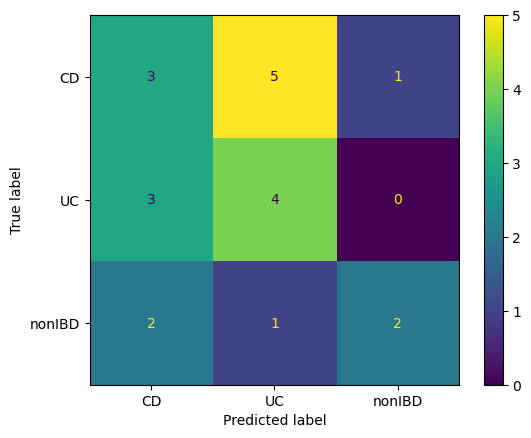

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Accuracy - le nombre de prédictions correctes sur le nombre total de prédictions 

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) 
print("Our model accuracy is : {}".format(accuracy))

Our model accuracy is : 0.42857142857142855


## Balanced Accuracy
Par contre, dans le cas où les exemples de certaines classes sont plus nombreux que d'autres 
classes (comme le cas présent)  </br>
L'exactitude peut donner des résultats trompeurs. </br>
Dans ce cas, il 
est avisé d'utiliser le Balanced Accuracy (l'exactitude balancée) qui donne un poids égal à 
l'exactitude du modèle pour chaque classe sans tenir compte du nombre d’échantillons dans chaque
classe. </br>

In [12]:
print("Nombre d'individus par classe:")
y.value_counts()

Nombre d'individus par classe:


CD        50
UC        30
nonIBD    25
Name: targets, dtype: int64

In [13]:
from sklearn.metrics import balanced_accuracy_score

bal_accuracy = balanced_accuracy_score(y_test, y_pred) 
print("Balanced accuracy is : {}".format(bal_accuracy))

Balanced accuracy is : 0.4349206349206349


## Voici d'autres métriques fréquemment utilisées pour les problèmes de classification

In [14]:
from sklearn.metrics import classification_report

labels_uniq = list(set(y_test))
print(classification_report(y_test, y_pred, target_names=labels_uniq))


              precision    recall  f1-score   support

      nonIBD       0.38      0.33      0.35         9
          UC       0.40      0.57      0.47         7
          CD       0.67      0.40      0.50         5

    accuracy                           0.43        21
   macro avg       0.48      0.43      0.44        21
weighted avg       0.45      0.43      0.43        21



Selon sklearn : </br>
The precision (not to be confounded with accuracy) -  is intuitively the ability of the classifier not to label as positive a sample that is negative. </br>
The recall - is intuitively the ability of the classifier to find all the positive samples.</br>
f1 score  - is the mean of the precision and recall</br>

In [15]:
def print_accuracy(y_test, y_pred):
    '''
        Petite fonction pour imprimer l'accuracy et la balance accuracy 
    '''
    accuracy = accuracy_score(y_test, y_pred) 
    print("Accuracy = {}".format(accuracy))

    bal_accuracy = balanced_accuracy_score(y_test, y_pred) 
    print("Balanced accuracy = {}".format(bal_accuracy))

print_accuracy(y_test, y_pred)

Accuracy = 0.42857142857142855
Balanced accuracy = 0.4349206349206349


## La validation croisée 
Jusqu'à maintenant, nous avons utilisé le même jeu de donné train et test généré avec le random_state = 42. </br>
Voyons ce qu'il arrive lorsque nous entrainons un modèle sur les mêmes données, mais avec une répartition différente en groupe `train` et `test` en changeant le random state:

In [16]:
SPLITS_NBR = 10
accuracy_list=[]
splits =[]

for i in range(SPLITS_NBR):
    random_state = i # en assignant un nombre différent au random_state, on produit des séparations différentes à chaque itération.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PERCENT_TEST, random_state = random_state)

    clf = DecisionTreeClassifier()
    clf.fit(X= X_train, y= y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) 

    # Saving our accuracy scores 
    accuracy_list.append(accuracy)
    splits.append(str(i))

    print(f"Iteration # {i}")
    print(f"Accuracy = {accuracy}")    

Iteration # 0
Accuracy = 0.5238095238095238
Iteration # 1
Accuracy = 0.42857142857142855
Iteration # 2
Accuracy = 0.42857142857142855
Iteration # 3
Accuracy = 0.47619047619047616
Iteration # 4
Accuracy = 0.5238095238095238
Iteration # 5
Accuracy = 0.5238095238095238
Iteration # 6
Accuracy = 0.47619047619047616
Iteration # 7
Accuracy = 0.6666666666666666
Iteration # 8
Accuracy = 0.5238095238095238
Iteration # 9
Accuracy = 0.2857142857142857


Puisque nous avons gardé en mémoire les valeurs de 'accuracy', nous pouvons visualiser les résultats des différents splits sous forme de graphique. 

The mean accuracy is : 0.486
with a standard deviation of : 0.097


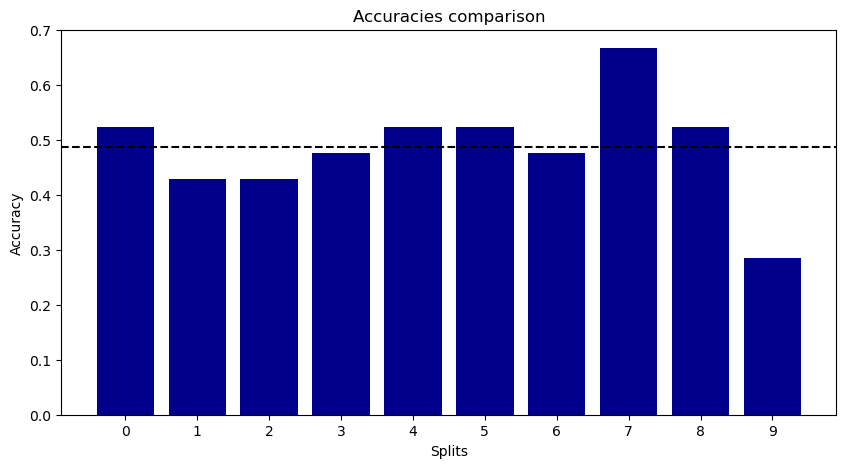

In [17]:
mean_accuracy = round(mean(accuracy_list), 3)
std_accuracy = round(stdev(accuracy_list), 3)

print(f"The mean accuracy is : {mean_accuracy}")
print(f"with a standard deviation of : {std_accuracy}")


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(splits, accuracy_list, color ='darkblue')
plt.axhline(mean_accuracy, color='black', linestyle='--')

plt.xlabel("Splits")
plt.ylabel("Accuracy")
plt.title("Accuracies comparison")
plt.show()

Comme vous pouvez le voir plus haut, la performance de notre modèle dépend grandement de la répartition des données entre le groupe 'train' ou 'test'. </br>  
Dû à la nature alléatoire de la séparation train - test, dans certains cas, le train set comprend des examples bien représentatifs du test set. </br>
Donc un modèle entrainé sur le train set est capable d'identifier correctement les données du test set. </br>

Dans d'autres splits, les échantillons du train set sont très différents des échantillons contenus dans le test set, </br>
donc le modèle entrainé sur ce train set fait beaucoup d'erreur lorsqu'il est présenté au données contenus dans le test set qui ne ressemble en rien au données du train set. </br>

Il est donc primordial d'évaluer notre modèle sur différentes séparation des données entre le groupe train et test pour avoir une estimation juste de la performance de notre modèle, indépendante de la séparation de nos données. </br>
Si non, on risque de baser nos décision sur une mesure trop optimiste ou pessimiste de nos données, dû à la nature alléatoire de la séparation de nos données et non à la performance réelle de notre modèle. </br>

# k-fold cross-validation
La validation croisée à k-plis (k-fold cross-validation) est une méthode qui permet d'entraîner notre modèle sur nos données séparées de k différentes manières entre le groupe train et test. 
De plus, la validation croisée s'assure que chaque échantillon de notre jeu de données se retrouve au moins une fois dans le train set et dans le test set. 

In [19]:
from sklearn.model_selection import cross_validate

# On initialize notre modèle
clf = DecisionTreeClassifier(random_state = 42)

# On utilise la function cross_validate pour estimer l'accuracy par validation croisée
# le paramètre 'cv' détermine le nombre de plis utilisé pour la validation croisée
# cv = 5, indique que la validation croisée se fait en 5 plis. 
cv = cross_validate(clf, X, y, cv= 5, scoring ='accuracy')

# La moyenne de la précision 
mean_accuracy = cv['test_score'].mean()
accuracy_standard_deviation = cv['test_score'].std()
print(f'Mean accuracy of model is approximately {mean_accuracy} +- {accuracy_standard_deviation}')

Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525


### Exercice: écrire le code pour estimer l'exactitude balancée (balanced accuracy) de notre modèle en utilisant la validation croisée. 
Pour la liste des mesures : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [20]:
# Réponse
clf = DecisionTreeClassifier()

cv = cross_validate(clf, X, y, cv= 5, scoring ='balanced_accuracy') ### 'balanced_accuracy'

# Imprimer les résultats
mean_accuracy = cv['test_score'].mean()
accuracy_standard_deviation = cv['test_score'].std()
print(f'Mean accuracy of model is approximately {mean_accuracy} +- {accuracy_standard_deviation}')

Mean accuracy of model is approximately 0.45777777777777784 +- 0.09359750972734525


#  Optimisation des hyperparamètres
Les paramètres tel que la profondeurs d’un arbre de décision ou le nombre d’arbres de décisions dans une forêt aléatoire sont appelés des hyperparamètres

Une bonne partie du travail de dévelopment d'un algorithme d'apprentissage automatique consiste à trouver les hyperparamètres optimaux pour le modèle à entrainer.</br>

Mais comment savoir quel profondeur choisir pour notre arbre de décisions? </br> 
Pour être certains de découvrir la profondeure optimale, il faut essayer toutes les profondeurs possibles. 

In [22]:
# Par souci de temps, explorons seulement les arbres de profondeurs 1 à 10:
MAX_DEPTH=10 
for d in range(1, MAX_DEPTH+1):
    clf = DecisionTreeClassifier(max_depth=d, random_state = 42)    
    # Utilisons la validation croisée pour estimer la précision de notre modèle
    cv = cross_validate(clf, X, y, cv= 5, scoring ='accuracy')  
    
    mean_accuracy = cv['test_score'].mean()
    accuracy_standard_deviation = cv['test_score'].std()

    print(f"Depth = {d}")
    print(f'Mean accuracy of model is approximately {mean_accuracy} +- {accuracy_standard_deviation}')

Depth = 1
Mean accuracy of model is approximately 0.5619047619047619 +- 0.055532875189002844
Depth = 2
Mean accuracy of model is approximately 0.49523809523809526 +- 0.10257456775494295
Depth = 3
Mean accuracy of model is approximately 0.48571428571428565 +- 0.06317380553057905
Depth = 4
Mean accuracy of model is approximately 0.5047619047619049 +- 0.05714285714285716
Depth = 5
Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525
Depth = 6
Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525
Depth = 7
Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525
Depth = 8
Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525
Depth = 9
Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525
Depth = 10
Mean accuracy of model is approximately 0.47619047619047616 +- 0.09523809523809525


Par contre, il existe d'autres hyperparamètres importants pour l’algorithme d'arbre de décisions que la profondeur. </br>
Par exemple, il y a le critère de décision ("criterion") qui détermine la formation d’une nouvelle branche. </br>


In [23]:
criterions = ["gini", "entropy"]

for c in criterions:
    clf = DecisionTreeClassifier(criterion = c, random_state = 42)
    cv = cross_validate(clf, X, y, cv= 5, scoring ='accuracy')  
    
    mean_accuracy = cv['test_score'].mean()
    accuracy_standard_deviation = cv['test_score'].std()


    print(f"Criterion = {c}")
    print(f'Mean accuracy of model is approximately {round(mean_accuracy, 3)} +- {round(accuracy_standard_deviation,3)}')

Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Criterion = entropy
Mean accuracy of model is approximately 0.448 +- 0.133


En réalité la profondeur optimale de l'arbre de décision dépend aussi du critère de décision utilisé </br>
Donc il est nécessaire de tester toutes les profondeurs pour chaques critères testés... 

In [24]:
MAX_DEPTH=10 
criterions = ["gini", "entropy"]

for c in criterions:

    for d in range(1, MAX_DEPTH+1):

        clf = DecisionTreeClassifier(max_depth=d, criterion = c, random_state = 42)
        cv = cross_validate(clf, X, y, cv= 5, scoring ='accuracy')  
        
        mean_accuracy = cv['test_score'].mean()
        accuracy_standard_deviation = cv['test_score'].std()

        print(f"Depth = {d}, Criterion = {c}")
        print(f'Mean accuracy of model is approximately {round(mean_accuracy, 3)} +- {round(accuracy_standard_deviation,3)}')

Depth = 1, Criterion = gini
Mean accuracy of model is approximately 0.562 +- 0.056
Depth = 2, Criterion = gini
Mean accuracy of model is approximately 0.495 +- 0.103
Depth = 3, Criterion = gini
Mean accuracy of model is approximately 0.486 +- 0.063
Depth = 4, Criterion = gini
Mean accuracy of model is approximately 0.505 +- 0.057
Depth = 5, Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Depth = 6, Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Depth = 7, Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Depth = 8, Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Depth = 9, Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Depth = 10, Criterion = gini
Mean accuracy of model is approximately 0.476 +- 0.095
Depth = 1, Criterion = entropy
Mean accuracy of model is approximately 0.438 +- 0.133
Depth = 2, Criterion = entropy
Mean accuracy of model is approximately 0.448 +- 0.1

# Grid search
Cette approche, consistant à essayer toutes les combinaisons possibles d'hyperparamètres se nomme "Grid search" ou recherche par grille. </br>
Comme vous pouvez le voir, programmer une boucle pour chaque hyperparamètre devient vite long et compliqué. </br>

Heureusement pour nous, scikit-learn a un outil qui effectue le travail pour nous : GridSearchCV</br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [52]:
from sklearn.model_selection import GridSearchCV

# 1. On donne une liste des hyperparamètres à explorer sous la forme d'un dictionnaire python:
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# 2.On définit quel type de modèle nous souhaitons entraîner:
clf = DecisionTreeClassifier(random_state=42)

# 3. Finnalement, on donne a l'algorithme GridSearchCV notre modèle et le dictionnaire d'hyperparamètres à explorer 
grid = GridSearchCV(clf, params, scoring = 'accuracy', cv = 5, return_train_score=True)
# et on entraîne nos modèles
grid = grid.fit(X_train, y_train)

L'objet 'grid' nous permet d'aller chercher directement le meilleur modèle selon la métrique que nous avons choisie (dans ce cas l'accuracy)

In [57]:
# On sauvegarde l'accuracy du meilleur arbre de décisions pour plus tard
DT_acc = grid.best_score_

# On imprime les résultats
best_model = grid.best_estimator_
print('Le meilleur modele selon notre grid search est:')
print(best_model)
print(f"Avec un accuracy de : {DT_acc}")

Le meilleur modele selon notre grid search est:
DecisionTreeClassifier(max_depth=2, random_state=42)
Avec un accuracy de : 0.6058823529411764


et l'utiliser pour faire des prédictions

In [32]:
print('Selon notre modèle les échantillons test sont classifiés comme suit: ')
best_model.predict(X_test)

Selon notre modèele les échantillons test sont classifiés comme suit: 


array(['CD', 'nonIBD', 'nonIBD', 'CD', 'UC', 'nonIBD', 'nonIBD', 'nonIBD',
       'nonIBD', 'CD', 'CD', 'UC', 'nonIBD', 'UC', 'CD', 'UC', 'CD',
       'nonIBD', 'CD', 'CD', 'nonIBD'], dtype=object)

In [33]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
        credits : https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

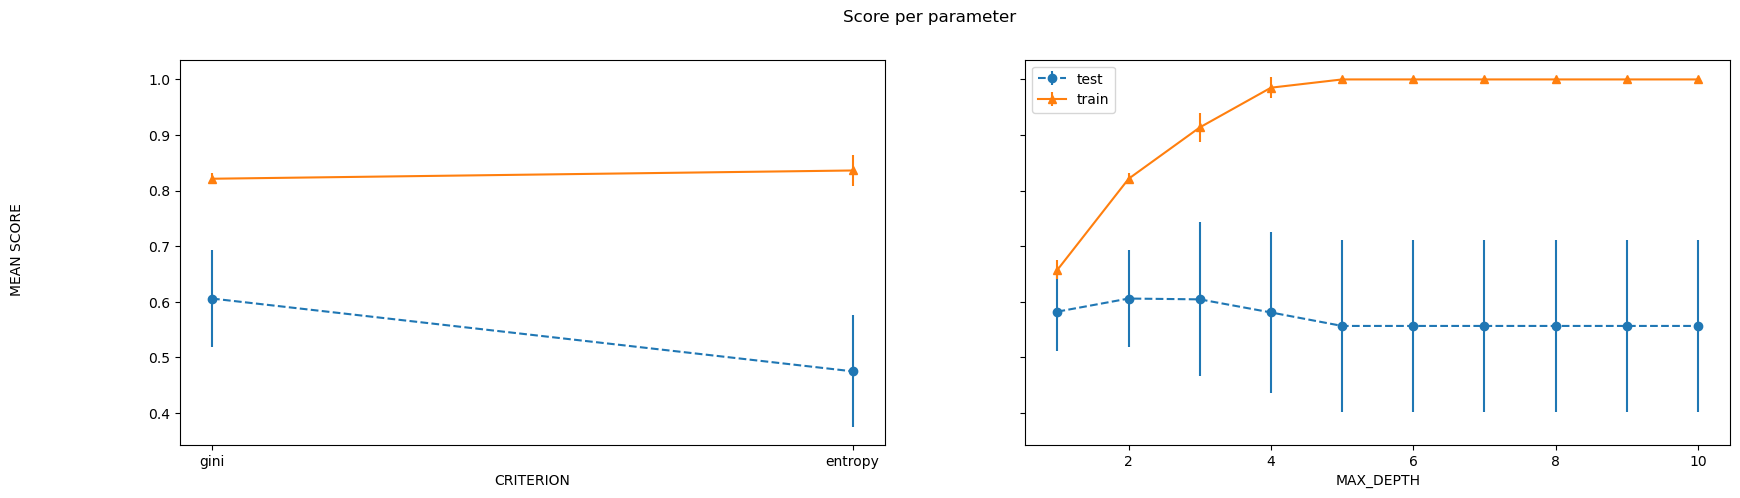

In [34]:
plot_search_results(grid)

### Exercice 1: selon les résultats obtenus. Quels sont les hyperparamètres optimaux pour un arbre de décision sur nos données?

In [35]:
criterion = 'écrivez votre réponse ici'
max_depth = 'écrivez votre réponse ici'

print(f"Best criterion is : {criterion}")
print(f"Best depth is : {max_depth}")

Best criterion is : écrivez votre réponse ici
Best depth is : écrivez votre réponse ici


### Exercice 2: entrainez une nouvelle gridsearch sur le même espace d'hyperparamètres,</br> mais cette fois, avec 10 plis au lieux de 5 et en utilisant la 'balanced accuracy' comme critère de sélection. </br></br> Quels sont les hyperparamètres optimaux?

In [36]:
# Réponse
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
clf = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(clf, params, scoring = 'balanced_accuracy', cv = 10, return_train_score=True)
# et on entraine
grid = grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print('Le meilleur modele selon notre grid search est:')
print(best_model)

### Randomized Search

Le grid search est un puissant outil pour identifier la combinaison optimale d'hyperparamètres pour un modèle. </br>
Par contre, de par sa nature combinatoire, le grid search demande beaucoup de ressources de calcul pour entraîner tous les modèles (dans l’exemple plus haut : 2 critères x 10 profondeurs x 5 validation croisées = 100 modèles entrainés). </br> Un grid search approfondi peut facilement entraîner plusieurs milliers de modèles. </br>

Une autre approche consiste à choisir des combinaisons d'hyperparamètres au hasard et de sélectionner la meilleure combinaison. </br> 
Bergstra et Bengio ont démontré que dans la plupart des cas, la recherche aléatoire pouvait arriver à des résultats similaires au grid search en testant beaucoup moins de paramètres. </br>
https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf 

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Au lieu de spécifier chaques valeur de chaque hyperparamètre à explorer on fournis à l'agorithme un générateur de nombre alléatoire (ex: randint()) 
# ainsi que les valeurs minimum et maximum que peuvent avoir les nombres générés (ex: 1 à 9)
params = {"max_depth": randint(1, 9), ### un nombre alléatoire entre 1 et 9
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]  ### On peut aussi spécifier une liste dans laquelle les valeurs seront sélectionées au hasard 
              }

clf = DecisionTreeClassifier(random_state = 42)

# le paramètre n_iter détermine le nombre de combinaisons d'hyperparamètres à essayer
random_search = RandomizedSearchCV(clf, params, cv=5, n_iter = 60, return_train_score=True)
random_search.fit(X_train, y_train)

# On peut accéder au meilleur modèle selon notre recherche alléatoire
print("The best model is:")
print( random_search.best_estimator_)
print(f"The model accuracy is : {random_search.best_score_}")

The best model is:
DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=8,
                       random_state=42)
The model accuracy is : 0.6198529411764706


Voici toutes les valeurs testées par notre algorithme :

In [39]:
results = random_search.cv_results_

params = []
for k in results.keys():
    if 'param_' in k:
        params.append(k)
params_dict ={}
for p in params: 
    params_dict[p[6:]] = list(set(results[p].data))

print("The values tested by our random search are:")
params_dict

The values tested by our random search are:


{'criterion': ['entropy', 'gini'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]}

# Autres modèles de classification

La librairie sklearn contient une large gamme de modèles d'apprentissage automatique qui sont tous compatibles avec les outils d'apprentissage de sklearn (ex: cross_valiate, GridSearchCV, etc...)<br> 
https://scikit-learn.org/stable/supervised_learning.html


## Forêt alléatoire
Voyons voir si l’on peut appliquer l’approche gridsearch à l’autre type de modèle de classification que vous avez utilisé, les forêts aléatoires:<br>  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Exercice: écrire le code pour effectuer une grid search pour une forêt alléatoire avec l'espace d'hyperparamètres suivant: </br>
* nombre d'estimateur : [10, 50, 100, 250, 500]
* critère : ['gini', 'entropy']
* Profondeur maximale : [1,2,3,4,5,6,7]

Le résutat devra être un objet GridSearchCV enregistré sous le nom de variable 'grid'

In [67]:
# from sklearn.ensemble import RandomForestClassifier

# params = {
#    # ajouter les paramètres a explorer pour une foret alleatoire ici
# }
# clf = RandomForestClassifier(random_state=42)

# grid = GridSearchCV(clf, params)
# grid.fit(data_matrix, labels)

# plot_search_results(grid)

In [41]:
# Réponse
from sklearn.ensemble import RandomForestClassifier

params = {
   "n_estimators" : [10, 50, 100, 250, 500], 
   "criterion" : ['gini', 'entropy'], 
   'max_depth' : [1,2,3,4,5,6,7]
}
clf = RandomForestClassifier(random_state=42)


grid = GridSearchCV(clf, params, cv = 5, scoring='accuracy',  return_train_score=True)
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [10, 50, 100, 250, 500]},
             return_train_score=True, scoring='accuracy')

The best model is:
RandomForestClassifier(max_depth=4, n_estimators=250, random_state=42)
The model accuracy is : 0.6183823529411765


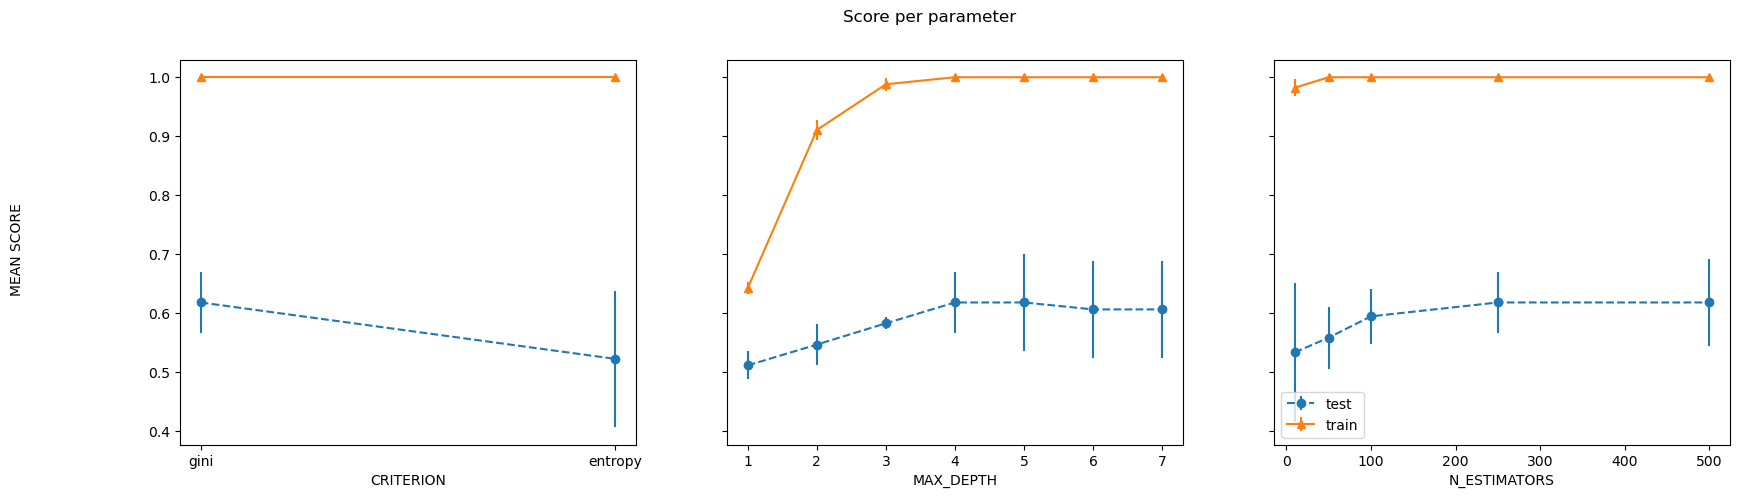

In [42]:
RF_acc = grid.best_score_

print("The best model is:")
print( grid.best_estimator_)
print(f"The model accuracy is : {grid.best_score_}")

plot_search_results(grid)

L'algorithme de forêt aléatoire demande beaucoup de calcul lors de l'apprentissage: </br>
Lorsque 'n_estimators = 500' l'algorithme entraîne 500 arbres de décision pour chaque modèle de forêt aléatoire. </br>
Donc dans le cadre d'une recherche par grille, on entraîne une forêt de 500 arbres de décision pour x2 critères différents x 7 profondeurs différentes x5 plis de validation croisée. </br>
C'est donc 35 000 arbres de décisions qui sont entrainés juste pour explorer le paramètre 'n_iter = 500'. </br>


### Exercise: écrivez le code pour explorer le même espace d'hyperparamètres que la grid search plus haut, mais en utilisant la recherche alléatoire (RandomizedSearchCV)

In [43]:
# Réponse

params = {
   "n_estimators" : randint(1, 500), 
   "criterion" : ['gini', 'entropy'], 
   'max_depth' : randint(1, 7)
}
clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(clf, params, cv=5, n_iter = 60, return_train_score=True)
random_search.fit(X_train, y_train)

The best model is:
RandomForestClassifier(max_depth=5, n_estimators=167, random_state=42)
The model accuracy is : 0.6183823529411765


In [44]:
# On peut accéder au meilleur modèle selon notre recherche alléatoire
print("The best model is:")
print( random_search.best_estimator_)
print(f"The model accuracy is : {random_search.best_score_}")

The best model is:
RandomForestClassifier(max_depth=5, n_estimators=167, random_state=42)
The model accuracy is : 0.6183823529411765


## KNeighborsClassifier


L'algorithme des k voisins les plus proches (K nearest neighbors) utilize la classe moyenne des 'k' points du train set les plus similaires à un nouvel échantillon pour déterminer dans quel classe ce nouvel échantillon appartient. 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

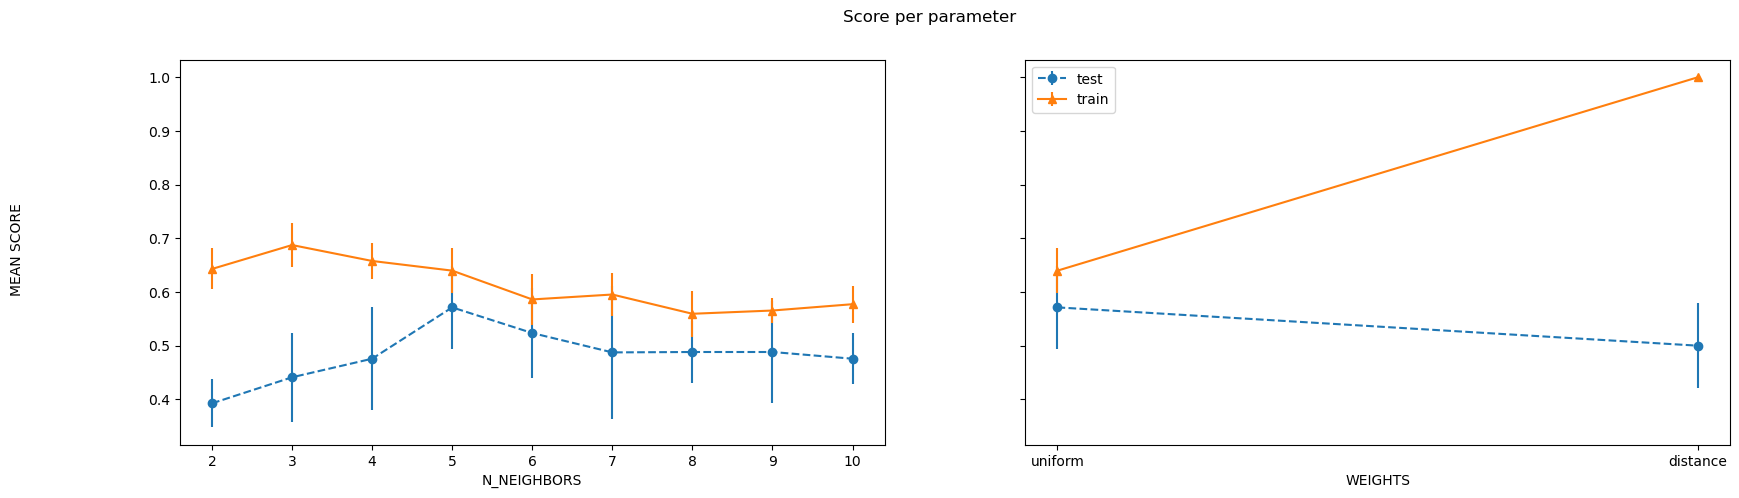

In [48]:
from sklearn.neighbors import KNeighborsClassifier

 # Ajouter les parametres a explorer pour un algorithme de classification par voisins. 
params = {
   'n_neighbors' : [2, 3, 4, 5, 6,7,8,9, 10], 
   'weights' : ['uniform', 'distance']
}
clf = KNeighborsClassifier()

grid = GridSearchCV(clf, params, cv = 5, scoring='accuracy',  return_train_score=True)
grid.fit(X_train, y_train)

KNN_acc = grid.best_score_
plot_search_results(grid)

In [49]:
print("The best model is:")
print( grid.best_estimator_)
print(f"The model accuracy is : {grid.best_score_}")

The best model is:
KNeighborsClassifier()
The model accuracy is : 0.5713235294117648


## LinearSVC

Machine à vecteur de support linéaire (*Linear support vector classifier*), calcule un hyperplan (une droite dans plusieurs dimensions) qui sépare le mieux les données de chaque classe de notre jeu d'entraînement.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [50]:
from sklearn.svm import LinearSVC

 # Ajouter les parametres à explorer pour un algorithme de classification par voisins. 
params = {
   'C' : [0.01, 0.1, 5, 10], 
}
clf = LinearSVC(max_iter = 5000, random_state = 42)


grid = GridSearchCV(clf, params, cv = 5, scoring='accuracy',  return_train_score=True)
grid.fit(X_train, y_train)

SVC_acc = grid.best_score_
# plot_search_results(grid)

In [62]:
print("The best model is:")
print( grid.best_estimator_)
print(f"The model accuracy is : {grid.best_score_}")

The best model is:
LinearSVC(C=0.01, max_iter=5000)
The model accuracy is : 0.8198529411764707


### Classification binaire avec le SCM

Plusieurs autres algorithmes d'apprentissage automatiques sont aussi accessibles en ligne et ont été ecrits pour être compatibles avec les outils de scikit-learn

Ici, on vous présente un algorithme développé à l'université Laval spécifiquement pour la classification de données métabolomiques à hautes dimensions. <br>
code : https://github.com/thibgo/randomscm/tree/main <br>
source : https://arxiv.org/abs/2208.06436

Le SCM est uniquement capable de performer de la classification binaire (i.e. pas plus de 2 classes à prédire)

In [59]:
# on consolide les cas 'CD' (Crohn's disease) et "UC" (ulcerative colitis) sous le meme label 'IBD' (inflamatory bowel disease)

y = y.str.replace('UC', 'IBD')
y = y.str.replace('CD', 'IBD')

y.value_counts()

# Split the data into a training and a testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PERCENT_TEST, random_state=42)

In [60]:
from randomscm import RandomScmClassifier 
 # Ajouter les parametres a explorer pour un algorithme de classification par voisins. 
params = {
   'n_estimators' : [2, 3, 5, 10, 20, 50], 
   'p_options' : [ [1],[2],[5], [10], [100]]

}
clf = RandomScmClassifier()


grid = GridSearchCV(clf, params, cv = 5, scoring='accuracy',  return_train_score=True)
grid.fit(X_train, y_train)

SCM_acc = grid.best_score_
# plot_search_results(grid)

In [61]:
print("The best model is:")
print( grid.best_estimator_)
print(f"The model accuracy is : {grid.best_score_}")

The best model is:
RandomScmClassifier(n_estimators=10, p_options=[10])
The model accuracy is : 0.8088235294117647


# Les algorithmes en tant que hyper-paramètres

En testant plusieurs algorithmes pour trouver le modèle optimal pour résoudre notre problème on traite essentiellement l'algorithme comme étant un hyperparamètre de plus à optimiser dans notre recherche. </br>
Par contre, il ne serait pas approprié de comparer un modèle aux hyperparamètres optimisés à un modèle qui n'a pas été optimisé du tout.</br>
 Donc, avant de pouvoir comparer les algorithmes entre eux, il est primordial de trouver les meilleurs hyperparamètres pour chaque algorithme. 

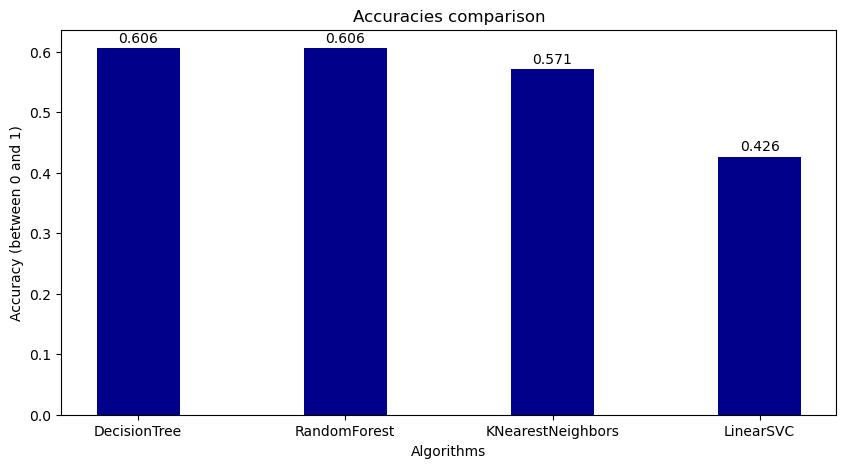

In [64]:
algos = ["DecisionTree", "RandomForest", "KNearestNeighbors", "LinearSVC"]
values = [DT_acc, RF_acc, KNN_acc, SVC_acc]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.01 , round(y[i], 3), ha = 'center')

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (between 0 and 1)")
plt.title("Accuracies comparison")
addlabels(algos, values)
plt.show()

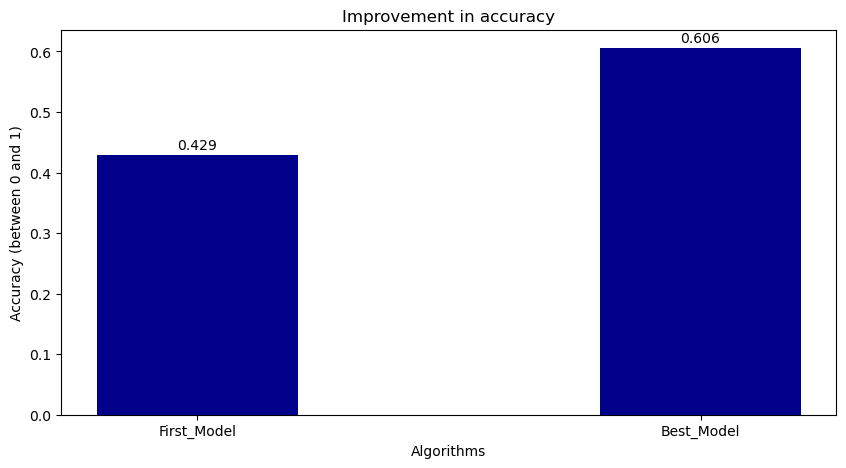

In [65]:
Best_acc = max(values)

algos = ["First_Model", "Best_Model"]
values = [FirstDT_acc, Best_acc]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, values, color ='darkblue',
        width = 0.4)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy (between 0 and 1)")
plt.title("Improvement in accuracy")
addlabels(algos, values)
plt.show()

# Régression

Les algorithmes que nous avons vu jusqu'à présent permettent de résoudre les problèmes de classification où nous essayons de prédire si notre échantillon appartient à un groupe parmi d'autres.  </br>
Lorsque la variable que nous essayons de prédire est une valeur continue (tel que prédire l’âge d'une personne, le taux de triglycérides dans le sang où la quantité d'un métabolite en particulier dans nos échantillons),</br>
le problème devient un problème de régression.</br> 
Le traitement d'un problème de régression est assez similaire à celui d'un problème de classification en apprentissage artificiel, par contre les modèles utilisés et les métriques d'évaluation sont différents. 


## Récupération du fichier et mise en forme de la matrice de données

In [208]:
df = pd.read_csv('C18_metabolomics_regression.csv', index_col =0)

In [209]:
# df = df.sample(frac=1, random_state=42)
# df = df.sample(frac=1)

In [210]:
# on extrait la liste de labels/targets
y = df["EPA"]
# on prend la matrice de données sans le target
X = df.iloc[:, :-1]
# on extrait la liste du nom des features
features_names = X.columns

In [211]:
# Split the data into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PERCENT_TEST, random_state=42)

## Entraînement de notre premier modèle de régression
Plusieurs algorithmes de classification ont aussi leur équivalent en régression. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html </br>
C'est le cas pour les arbres de décisions et les forêts aléatoires. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [212]:
from sklearn.tree import DecisionTreeRegressor

est = DecisionTreeRegressor(random_state = 13)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)
train_pred = est.predict(X_train)

## Métriques de regression

Pour visualiser la performance d'un modèle de regression nous pouvons créer un nuage de points où la valeur prédite de chaque points de notre jeu de donné est sur l'axe x et la valeur réelle est sur l'axe y.</br>
Il est utile de comparer le nuage de points ainsi généré à une droite parfaite (x = y) qui correspond à un modèle qui fait des prédictions parfaites. 

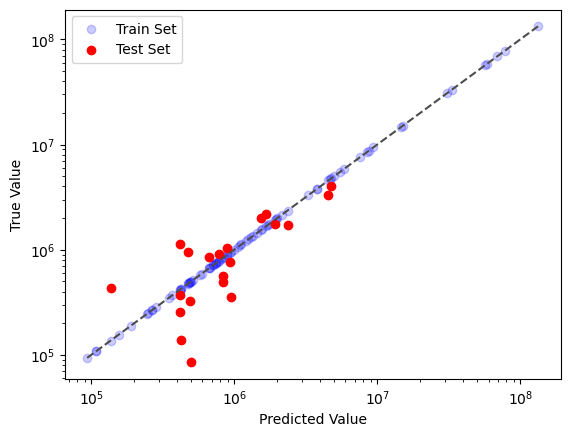

In [213]:
def plot_regression( train_pred, test_pred, log_scale = True):
    '''
        Fonction pour visualiser les prédictions avec matplotlib
    '''
    ax = plt.subplot(1,1, 1) 

    ax.scatter(train_pred, y_train, color='b', alpha =0.2,  label="Train Set")
    ax.plot([y_train.max(), y_train.min()], [y_train.max(), y_train.min()], ls="--", c=".3")
    ax.scatter(test_pred, y_test, color='r', label="Test Set")

    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("True Value")
    ax.legend()
    
    # Pour mieux visualiser nos données, nous avons l'option de mettre les axes on échelle logarithmique
    if log_scale == True: 
        ax.set_yscale('log')
        ax.set_xscale('log')

    plt.show()

plot_regression (train_pred, y_pred)

## L'erreur absolue 
L'erreur absolue est la métrique la plus intuitive. </br>
Si notre modèle prédit une valeur de 100 et la vraie valeur est 150, l’erreur absolue est:</br> 150-100 = 50. 


In [214]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

percent_error = round(mae/mean(y_test) *100)

print (f"L'erreur absolue de notre modèle est : {mae}")
print (f"Ce qui correspond à une erreur de {percent_error}% sur chaque prédiction")

L'erreur absolue de notre modèle est : 384920.09523809527
Ce qui correspond à une erreur de 34% sur chaques prédictions


## L'erreur moyenne au carré
Dans beaucoup de cas, il est préférable de pénaliser de façon disproportionnelle les erreurs plus grandes que les erreurs plus petites pour 'aider' le modèle à converger vers la bonne solution. </br>
Dans ces cas, on utilise l'erreur moyenne au carré (mean_squared error ou mse). </br>

Si la vrai valeur = 100 </br>
la prédiction du modèle A = 105</br>
la prédiction du modèle B = 110 </br>

La mae du modèle A sera : 100-105 = 5 </br>
La mae du modèle A sera : 100-110 = 10</br>

La mse du modèle A sera : (100-105)^2 = 25 </br>
La mse du modèle B sera : (100-110)^2 = 100</br>


In [215]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred)
rmse

220668469218.2857

## Le score R carré
Le score R carré, est une autre mesure souvent utilisée. Mathématiquement parlant, il s'agit de la somme des carrés des valeurs prédites divisé par la somme des carrés des vraies valeurs. </br>

En therme plus intuitif, il s'agit d'une comparaison entre l'erreur de notre modèle vs l'erreur d'un modèle 'hypothétique' qui donne tout le temps la valeur moyenne comme prédiction, peu importe l'intrant. </br>
Un modèle qui donne de parfaite prédiction aura un r2 de 1, alors qu'un modèle dont les prédictions sont aussi bonnes que donner tout le temps la moyenne aura une valeur de 0. </br>
*Il est aussi possible d'avoir un score de r2 négatif, si l'erreur de notre modèle est pire que prédire tout le temps la moyenne. </br>


In [216]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7924008417124894

## Validation croisée
Les principes que nous avons vus en classification s'appliquent aussi en régression. </br> 
Prendre la mesure d'un modèle sur une seule séparation train test risque de donner une vue biaisée des performances de notre modèle. </br>
Il est donc, tout aussi important de faire une validation croisée en régression qu'en classification. 

### Exercise: appliquez la validation croisée pour déterminer le r2 de notre modèle de régression. 

In [217]:
# Réponse
est = DecisionTreeRegressor(random_state = 13)
cv = cross_validate(est, X, y, cv= 5, scoring ='r2')

###
mean_r2 = cv['test_score'].mean()
r2_standard_deviation = cv['test_score'].std()

print(f'The R2 score of the model is approximately {mean_r2} +- {r2_standard_deviation}')

The R2 score of the model is approximately 0.2738524190306991 +- 0.3289587881858114


# Bonus

# XGBoost
L'un des algorithmes les plus performants à ce jour en apprentissage non profond (utiles sur les jeux de données de petite taille, donc moins de 1000 exemples) est XGBoost. https://xgboost.readthedocs.io/en/stable/

In [218]:
from xgboost import XGBRegressor

# Train model
model = XGBRegressor()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)


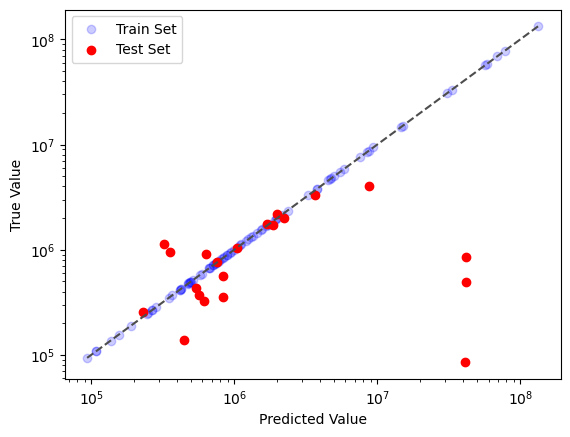

-226.3634221116067

In [219]:
plot_regression (train_pred, y_pred)
r2_score(y_test, y_pred)

On obtient un score r2 très mauvais. 
Appliquons la validation croisée pour vérifier qu'il ne s'agit pas d'une mauvais séparation train-test due au hasard:

In [220]:
est =XGBRegressor()
cv = cross_validate(est, X, y, cv= 5, scoring ='r2')

mean_r2 = cv['test_score'].mean()
r2_standard_deviation = cv['test_score'].std()

print(f'The R2 score of the model is approximately {mean_r2} +- {r2_standard_deviation}')

The R2 score of the model is approximately -3.7934004848012686 +- 8.515512946847135


Le r2 est toujours négatif, donc le modèle n'est même pas capble de battre un modèle qui ne ferait que prédire la moyenne. En général, la plupart des modèles d'apprentissage automatiques devrait avoir un r2 au moins supérieur ou égal à zéro. C'est le signe que quelque chose cloche dans notre approche...

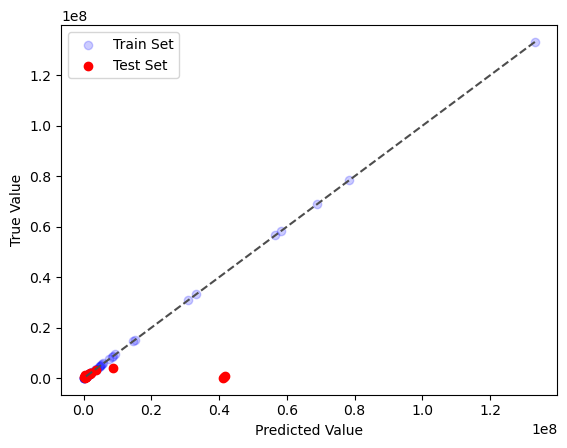

In [221]:
plot_regression (train_pred, y_pred, log_scale = False)

En effet, si on regarde les prédictions en échelle logarithme, on voit que XGBoost n'arrive pas à faire de bonnes prédictions lorsque les valeurs de y_test sont très grandes.</br>
Pour rendre ces valeurs moins extrêmes, nous pouvons faire une transformation logarithmique de nos données sans impacter la validité de notre modèle. 


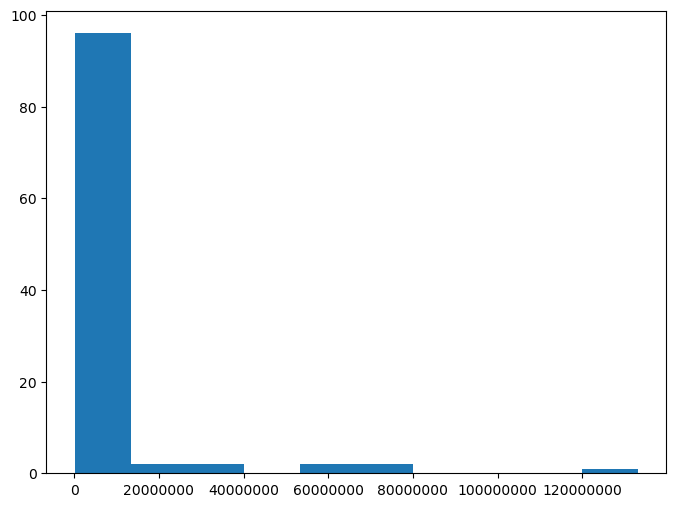

In [222]:
# Parameters to plot x-axis in a non-scientific notation
plt.figure(figsize=(8, 6))
plt.ticklabel_format(scilimits=(0, 101))

# Plot y values 
plt.hist(y)

plt.show()

In [ ]:
def log_transform(data):
    """
    Petite function pour appliquer une transformation logarithmique à toutes nos données
    """
    data = data+1  # Add 1 to every value, because log(0) = -inf
    data = data.transform(np.log)
    return data
    
# Faire une trasnformation logarithmique de toutes nos données
X_train = log_transform(X_train)
X_test = log_transform(X_test)
y_train = log_transform(y_train)
y_test = log_transform(y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

The R2 score is 0.6109014163733328


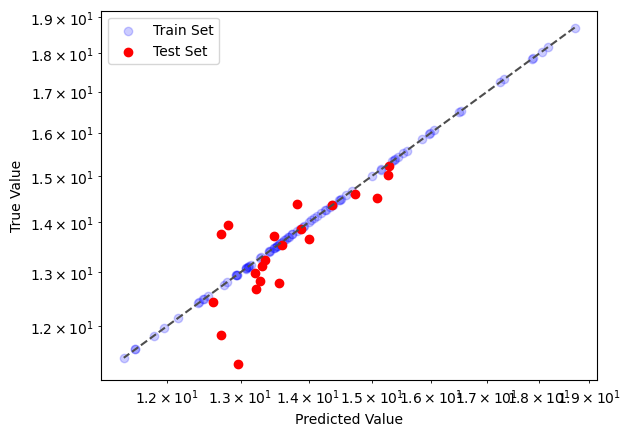

In [227]:
model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
train_pred = model.predict(X_train)

y_train = np.array(y_train)
y_test = np.array(y_test)

r2 = r2_score(y_test, y_pred)
print(f'The R2 score is {r2}')

plot_regression (train_pred, y_pred)

### Exercise : calculez le score r2 du modèle XGBoost par validation croisée, après avoir appliqué la transformation logarithmique aux données X et y. 

In [ ]:
### Ajoutez votre code ici

# Imprimer des résultats 
mean_r2 = cv['test_score'].mean()
r2_standard_deviation = cv['test_score'].std()

print(f'The R2 score of the model is approximately {mean_r2} +- {r2_standard_deviation}')

In [228]:
# Réponse 

# Log transform of the data
X = log_transform(X)
y = log_transform(y)

# Cross validation of the model
est =XGBRegressor()
cv = cross_validate(est, X, y, cv= 5, scoring ='r2')

# Printing the results
mean_r2 = cv['test_score'].mean()
r2_standard_deviation = cv['test_score'].std()

print(f'The R2 score of the model is approximately {mean_r2} +- {r2_standard_deviation}')

The R2 score of the model is approximately 0.8713335446668798 +- 0.03658903800351896
